In [1]:
import pandas as pd 

filename = '../input/ice-cream-dataset/combined/products.csv'
full_columns = ['brand', 'key', 'name', 'subhead', 'description', 'rating', 'rating_count', 'ingredients']
usecols = ['brand', 'key', 'name', 'ingredients']
df = pd.read_csv(filepath_or_buffer=filename, usecols=usecols, )
df.head()

,brand,key,name,ingredients
0,bj,0_bj,Salted Caramel Core,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [2]:
from re import sub
t0_columns = ['key', 'brand', 'name', 'ingredients']
t0_df = df[t0_columns].copy(deep=True)
t0_df['long name'] = t0_df.apply(func=lambda x: ' '.join([x['brand'], x['name']]), axis=1)
# remove ingredient sublists that are in parentheses
t0_df['short'] = t0_df['ingredients'].apply(func=lambda x: sub(r'\([^)]*\)', '', x).lower())
t0_df['list'] = t0_df['short'].str.split(',')
t0_df['list'] = t0_df['list'].apply(func=lambda x: [item.replace('and/or', ' ').replace(':', ' ').strip() for item in x])
t0_df.head()

,key,brand,name,ingredients,long name,short,list
0,0_bj,bj,Salted Caramel Core,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Salted Caramel Core,"cream, skim milk, liquid sugar , water, brown ...","[cream, skim milk, liquid sugar, water, brown ..."
1,1_bj,bj,Netflix & Chilll'd™,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Netflix & Chilll'd™,"cream, skim milk, liquid sugar , water, sugar,...","[cream, skim milk, liquid sugar, water, sugar,..."
2,2_bj,bj,Chip Happens,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,...",bj Chip Happens,"cream, liquid sugar , skim milk, water, sugar,...","[cream, liquid sugar, skim milk, water, sugar,..."
3,3_bj,bj,Cannoli,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Cannoli,"cream, skim milk, liquid sugar , water, corn ...","[cream, skim milk, liquid sugar, water, corn s..."
4,4_bj,bj,Gimme S’more!™,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ...",bj Gimme S’more!™,"cream, skim milk, water, liquid sugar , sugar,...","[cream, skim milk, water, liquid sugar, sugar,..."


In [3]:
# get the dummies for the ingredients
t1_df = pd.concat([t0_df, pd.get_dummies(t0_df['list'].explode()).groupby(level=0).sum()], axis=1)
t1_df.head()

,key,brand,name,ingredients,long name,short,list,acesulfame potassium,almond extract,almond milk,...,whole milk powder,whole wheat graham flour,whole wheat/graham flour,wine,xanthan gum,yeast extract,yellow 5,yellow 5 lake,yellow 6,yellow 6 lake
0,0_bj,bj,Salted Caramel Core,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Salted Caramel Core,"cream, skim milk, liquid sugar , water, brown ...","[cream, skim milk, liquid sugar, water, brown ...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1_bj,bj,Netflix & Chilll'd™,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Netflix & Chilll'd™,"cream, skim milk, liquid sugar , water, sugar,...","[cream, skim milk, liquid sugar, water, sugar,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2_bj,bj,Chip Happens,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,...",bj Chip Happens,"cream, liquid sugar , skim milk, water, sugar,...","[cream, liquid sugar, skim milk, water, sugar,...",0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3_bj,bj,Cannoli,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Cannoli,"cream, skim milk, liquid sugar , water, corn ...","[cream, skim milk, liquid sugar, water, corn s...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4_bj,bj,Gimme S’more!™,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ...",bj Gimme S’more!™,"cream, skim milk, water, liquid sugar , sugar,...","[cream, skim milk, water, liquid sugar, sugar,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# drop ingredients that only appear once
counts = t1_df.drop(columns=['brand', 'ingredients', 'key', 'list', 'long name', 'name', 'short']).sum().to_dict()
t1_df = t1_df.drop(columns=[key for key, value in counts.items() if value == 1])
t1_df = t1_df.sample(frac=1).reset_index(drop=True)
t1_df.head()

,key,brand,name,ingredients,long name,short,list,acesulfame potassium,almond milk,almonds,...,whey protein concentrate,whiskey,white chocolate ice cream,whole egg and egg yolk,whole milk powder,whole wheat graham flour,whole wheat/graham flour,xanthan gum,yellow 5 lake,yellow 6 lake
0,11_talenti,talenti,COCONUT ALMOND CHOCOLATE GELATO,"MILK, SUGAR, CREAM, CHOCOLATE (PROCESSED WITH ...",talenti COCONUT ALMOND CHOCOLATE GELATO,"milk, sugar, cream, chocolate , almonds, cocon...","[milk, sugar, cream, chocolate, almonds, cocon...",0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,11_bj,bj,Bourbon Pecan Pie,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Bourbon Pecan Pie,"cream, skim milk, liquid sugar , water, corn s...","[cream, skim milk, liquid sugar, water, corn s...",0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,41_bj,bj,S'mores,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,...",bj S'mores,"cream, liquid sugar , skim milk, water, sugar,...","[cream, liquid sugar, skim milk, water, sugar,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39_breyers,breyers,CarbSmart™ Fudge Bar,"MILK, WATER, MALTITOL SYRUP, POLYDEXTROSE, COC...",breyers CarbSmart™ Fudge Bar,"milk, water, maltitol syrup, polydextrose, coc...","[milk, water, maltitol syrup, polydextrose, co...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16_talenti,talenti,DARK CHOCOLATE CHERRY,"MILK, SUGAR, CREAM, EGG YOLKS AND EGG WHITES, ...",talenti DARK CHOCOLATE CHERRY,"milk, sugar, cream, egg yolks and egg whites, ...","[milk, sugar, cream, egg yolks and egg whites,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# build t-SNE clusters based on ingredients
from sklearn.manifold import TSNE
model = TSNE(n_components=2, verbose=1, random_state=1)
model_results = model.fit_transform(X=t1_df.drop(columns=['brand', 'ingredients', 'key', 'list', 'long name', 'name', 'short']).values)
plot_df = pd.DataFrame(data={'brand': t1_df['brand'],'name': t1_df['name'], 'x': model_results[:, 0], 'y': model_results[:, 1]})
plot_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.001s...
[t-SNE] Computed neighbors for 241 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 1.671249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.314056
[t-SNE] KL divergence after 1000 iterations: 0.482100


,brand,name,x,y
0,talenti,COCONUT ALMOND CHOCOLATE GELATO,7.487035,-7.854250
1,bj,Bourbon Pecan Pie,-6.993245,20.341011
2,bj,S'mores,-2.093233,20.020191
3,breyers,CarbSmart™ Fudge Bar,-2.332732,-17.065680
4,talenti,DARK CHOCOLATE CHERRY,8.537502,-12.565231


<Axes: xlabel='x', ylabel='y'>

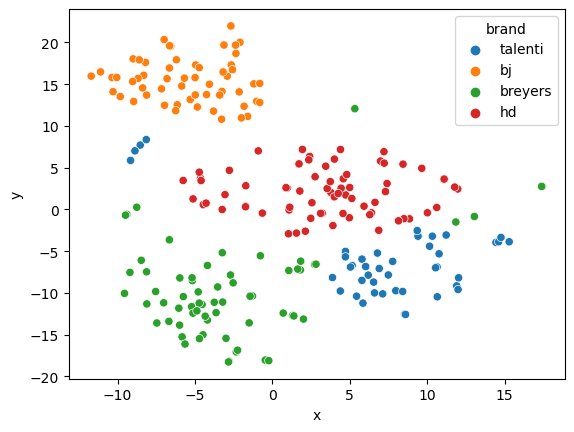

In [6]:
# plot the clusters
%matplotlib inline
from seaborn import scatterplot
scatterplot(data=plot_df, x='x', y='y', hue='brand')